In [54]:
#Committee & uncerstainity sampling
from modAL.models import ActiveLearner
from modAL.models import Committee

#the sampling strategies
from modAL.uncertainty import classifier_uncertainty
from modAL.uncertainty import entropy_sampling, uncertainty_sampling, margin_sampling
from modAL.disagreement import vote_entropy_sampling, max_disagreement_sampling

#the algorithm for active learning
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

## Data Loading

In [56]:
data_train = pd.read_csv('Data/pendigits.tra').to_numpy()
data_test = pd.read_csv('Data/pendigits.tes').to_numpy()

#data_for_training
x = data_train[:,:16]
y = data_train[:,16]

#data_for_testing
x_tes = data_test[:,:16]
y_tes = data_test[:,16]

## Stream Based Sampling with Uncertainity

In [75]:
def active_single_stream_based(x_train,y_train,x_tes,y_tes,query_strategy): 
    accuracy_list = []
    num_queried = 0
    num_ignored = 0
    
    #initial 10 percent points
    idx_10_percent = np.random.choice(range(x_train.shape[0]),size=int(0.1*x_train.shape[0]),replace=False)
    x_10 = x_train[idx_10_percent]
    y_10 = y_train[idx_10_percent]
    
    #initial_learning
    learner = ActiveLearner(estimator=KNeighborsClassifier(n_neighbors=3),X_training=x_10,y_training=y_10,query_strategy=query_strategy)
    
    while learner.score(x_tes, y_tes) < 0.965:

          #choose a point randomly to check - simulate a stream
        point = np.random.choice(range(len(x_train)))
        if classifier_uncertainty(learner, x_train[point].reshape(1, -1)) >= 0.3:

         #learning again after every query; might avoid it if the trainnig is time consuming
            learner.teach(x_train[point].reshape(1, -1), y_train[point].reshape(-1, ))
            updated_acc = learner.score(x_tes, y_tes)
            accuracy_list.append(updated_acc)
            num_queried += 1
            print(f"Point updated: {point}; Accuracy achieved: {updated_acc}")

        else:
            num_ignored += 1
            print(f"Ignored this point from labelling: {point}") 
    return accuracy_list, num_queried, num_ignored

## Stream Based Sampling QBC

In [88]:
def active_committee_stream_based(x_train,y_train,x_tes,y_tes,n_committee,query_strategy):
    accuracy_list = []
    num_queried = 0
    num_ignored = 0
    
    #initial 10 percent points
    idx_10_percent = np.random.choice(range(x_train.shape[0]),size=int(0.1*x_train.shape[0]),replace=False)
    x_10 = x_train[idx_10_percent]
    y_10 = y_train[idx_10_percent]
    
    learners = []
    for i in range(n_committee):
        learner = ActiveLearner(estimator=KNeighborsClassifier(n_neighbors=3),X_training=x_10,y_training=y_10)
        learners.append(learner)
        
    committee = Committee(learner_list=learners,query_strategy=query_strategy)
    comm_perform = []
    comm_perform.append(committee.score(x_tes,y_tes))
    
    while committee.score(x_tes, y_tes) < 0.965:

          #choose a point randomly to check - simulate a stream
        point = np.random.choice(range(len(x_train)))
        if classifier_uncertainty(committee, x_train[point].reshape(1, -1)) >= 0.3:

         #learning again after every query; might avoid it if the trainnig is time consuming
            committee.teach(x_train[point].reshape(1, -1), y_train[point].reshape(-1, ))
            updated_acc = committee.score(x_tes, y_tes)
            comm_perform.append(updated_acc)
            num_queried += 1
            print(f"Point updated: {point}; Accuracy achieved: {updated_acc}")

        else:
            num_ignored += 1
            print(f"Ignored this point from labelling: {point}") 
    return comm_perform, num_queried, num_ignored

## Evaluation & Graphing

In [76]:
#uncertainity evaluation
least_confident_track = active_single_stream_based(x,y,x_tes,y_tes,uncertainty_sampling)
margin_sampling_track = active_single_stream_based(x,y,x_tes,y_tes,margin_sampling)
entropy_track = active_single_stream_based(x,y,x_tes,y_tes,entropy_sampling)

Ignored this point from labelling: 2793
Ignored this point from labelling: 996
Ignored this point from labelling: 4556
Ignored this point from labelling: 3762
Ignored this point from labelling: 4345
Ignored this point from labelling: 6384
Ignored this point from labelling: 3311
Ignored this point from labelling: 4819
Ignored this point from labelling: 2734
Point updated: 2121; Accuracy achieved: 0.9305118673148413
Ignored this point from labelling: 2615
Ignored this point from labelling: 6574
Ignored this point from labelling: 6587
Ignored this point from labelling: 1670
Ignored this point from labelling: 1474
Ignored this point from labelling: 2319
Ignored this point from labelling: 5890
Ignored this point from labelling: 6646
Ignored this point from labelling: 5021
Ignored this point from labelling: 3523
Ignored this point from labelling: 1745
Ignored this point from labelling: 2845
Ignored this point from labelling: 4521
Ignored this point from labelling: 4620
Ignored this point fro

Ignored this point from labelling: 2174
Ignored this point from labelling: 2372
Ignored this point from labelling: 1016
Ignored this point from labelling: 5895
Ignored this point from labelling: 7484
Ignored this point from labelling: 6753
Point updated: 2821; Accuracy achieved: 0.9399485273091222
Point updated: 5519; Accuracy achieved: 0.9399485273091222
Ignored this point from labelling: 3160
Point updated: 4202; Accuracy achieved: 0.9399485273091222
Ignored this point from labelling: 4531
Ignored this point from labelling: 3394
Ignored this point from labelling: 3085
Ignored this point from labelling: 4963
Ignored this point from labelling: 7492
Ignored this point from labelling: 6885
Ignored this point from labelling: 6767
Ignored this point from labelling: 3373
Ignored this point from labelling: 4335
Ignored this point from labelling: 1553
Ignored this point from labelling: 793
Ignored this point from labelling: 5052
Ignored this point from labelling: 589
Ignored this point from l

Ignored this point from labelling: 4011
Ignored this point from labelling: 2329
Ignored this point from labelling: 1716
Ignored this point from labelling: 2387
Ignored this point from labelling: 6231
Ignored this point from labelling: 1082
Ignored this point from labelling: 3417
Ignored this point from labelling: 6345
Ignored this point from labelling: 6425
Ignored this point from labelling: 2020
Ignored this point from labelling: 5525
Ignored this point from labelling: 36
Ignored this point from labelling: 384
Ignored this point from labelling: 1229
Ignored this point from labelling: 6955
Ignored this point from labelling: 7406
Ignored this point from labelling: 5536
Ignored this point from labelling: 4181
Ignored this point from labelling: 2407
Ignored this point from labelling: 4532
Ignored this point from labelling: 1931
Ignored this point from labelling: 5968
Ignored this point from labelling: 3818
Ignored this point from labelling: 3634
Ignored this point from labelling: 3747
Ign

Point updated: 6597; Accuracy achieved: 0.9525307406348299
Ignored this point from labelling: 5294
Ignored this point from labelling: 3412
Ignored this point from labelling: 1497
Ignored this point from labelling: 3239
Ignored this point from labelling: 4642
Point updated: 2305; Accuracy achieved: 0.9519588218472976
Ignored this point from labelling: 965
Ignored this point from labelling: 599
Ignored this point from labelling: 4769
Ignored this point from labelling: 6446
Point updated: 2576; Accuracy achieved: 0.952816700028596
Ignored this point from labelling: 5608
Ignored this point from labelling: 1603
Ignored this point from labelling: 5987
Ignored this point from labelling: 2026
Ignored this point from labelling: 4533
Ignored this point from labelling: 3181
Ignored this point from labelling: 813
Ignored this point from labelling: 5739
Ignored this point from labelling: 6518
Ignored this point from labelling: 6117
Ignored this point from labelling: 3315
Point updated: 674; Accurac

Ignored this point from labelling: 7292
Ignored this point from labelling: 3782
Ignored this point from labelling: 3446
Ignored this point from labelling: 4603
Ignored this point from labelling: 4508
Ignored this point from labelling: 5064
Ignored this point from labelling: 2024
Ignored this point from labelling: 3089
Ignored this point from labelling: 6894
Ignored this point from labelling: 1571
Ignored this point from labelling: 7192
Ignored this point from labelling: 3033
Ignored this point from labelling: 54
Ignored this point from labelling: 2467
Ignored this point from labelling: 560
Ignored this point from labelling: 921
Ignored this point from labelling: 3811
Ignored this point from labelling: 6688
Ignored this point from labelling: 6366
Ignored this point from labelling: 5727
Ignored this point from labelling: 5594
Ignored this point from labelling: 6871
Ignored this point from labelling: 2541
Ignored this point from labelling: 666
Ignored this point from labelling: 3316
Ignor

Ignored this point from labelling: 1173
Ignored this point from labelling: 2232
Ignored this point from labelling: 5201
Ignored this point from labelling: 2676
Ignored this point from labelling: 3550
Ignored this point from labelling: 5040
Ignored this point from labelling: 5077
Ignored this point from labelling: 1714
Ignored this point from labelling: 1234
Ignored this point from labelling: 6156
Ignored this point from labelling: 6574
Ignored this point from labelling: 6853
Ignored this point from labelling: 5329
Ignored this point from labelling: 3725
Ignored this point from labelling: 378
Ignored this point from labelling: 6249
Ignored this point from labelling: 135
Ignored this point from labelling: 3804
Ignored this point from labelling: 5638
Ignored this point from labelling: 2729
Ignored this point from labelling: 2865
Ignored this point from labelling: 1436
Ignored this point from labelling: 976
Ignored this point from labelling: 5433
Ignored this point from labelling: 2683
Ign

Ignored this point from labelling: 1593
Ignored this point from labelling: 597
Ignored this point from labelling: 7078
Ignored this point from labelling: 2213
Ignored this point from labelling: 6456
Ignored this point from labelling: 4322
Ignored this point from labelling: 2383
Point updated: 3019; Accuracy achieved: 0.9579639691163855
Ignored this point from labelling: 664
Ignored this point from labelling: 5295
Ignored this point from labelling: 2959
Ignored this point from labelling: 1394
Ignored this point from labelling: 5386
Ignored this point from labelling: 5953
Ignored this point from labelling: 6886
Ignored this point from labelling: 6532
Ignored this point from labelling: 3435
Ignored this point from labelling: 2226
Point updated: 5708; Accuracy achieved: 0.9579639691163855
Ignored this point from labelling: 5374
Ignored this point from labelling: 2368
Ignored this point from labelling: 2837
Ignored this point from labelling: 12
Ignored this point from labelling: 5077
Ignore

Ignored this point from labelling: 3523
Ignored this point from labelling: 3641
Ignored this point from labelling: 2928
Ignored this point from labelling: 1125
Ignored this point from labelling: 1664
Ignored this point from labelling: 3388
Ignored this point from labelling: 1833
Ignored this point from labelling: 1741
Ignored this point from labelling: 602
Ignored this point from labelling: 6943
Ignored this point from labelling: 543
Ignored this point from labelling: 6002
Ignored this point from labelling: 431
Ignored this point from labelling: 4700
Ignored this point from labelling: 3646
Ignored this point from labelling: 803
Ignored this point from labelling: 2663
Ignored this point from labelling: 4959
Ignored this point from labelling: 6414
Ignored this point from labelling: 1839
Ignored this point from labelling: 705
Ignored this point from labelling: 267
Ignored this point from labelling: 6031
Ignored this point from labelling: 4378
Ignored this point from labelling: 3178
Ignore

Ignored this point from labelling: 5214
Ignored this point from labelling: 5302
Ignored this point from labelling: 659
Ignored this point from labelling: 1461
Ignored this point from labelling: 570
Ignored this point from labelling: 6228
Ignored this point from labelling: 1866
Ignored this point from labelling: 2367
Ignored this point from labelling: 300
Point updated: 4332; Accuracy achieved: 0.9608235630540464
Ignored this point from labelling: 6087
Ignored this point from labelling: 5020
Ignored this point from labelling: 4664
Ignored this point from labelling: 2345
Ignored this point from labelling: 143
Ignored this point from labelling: 6151
Ignored this point from labelling: 5141
Ignored this point from labelling: 2310
Ignored this point from labelling: 2226
Ignored this point from labelling: 143
Ignored this point from labelling: 3407
Ignored this point from labelling: 2162
Ignored this point from labelling: 3661
Ignored this point from labelling: 7396
Ignored this point from la

Ignored this point from labelling: 4320
Ignored this point from labelling: 1814
Point updated: 2465; Accuracy achieved: 0.9608235630540464
Ignored this point from labelling: 2653
Ignored this point from labelling: 1589
Ignored this point from labelling: 2370
Ignored this point from labelling: 5359
Point updated: 5305; Accuracy achieved: 0.9608235630540464
Ignored this point from labelling: 1935
Ignored this point from labelling: 5298
Ignored this point from labelling: 7256
Ignored this point from labelling: 5976
Ignored this point from labelling: 5825
Ignored this point from labelling: 67
Ignored this point from labelling: 7368
Ignored this point from labelling: 5076
Ignored this point from labelling: 2805
Ignored this point from labelling: 4731
Ignored this point from labelling: 3632
Ignored this point from labelling: 1505
Ignored this point from labelling: 6049
Ignored this point from labelling: 1164
Ignored this point from labelling: 774
Ignored this point from labelling: 3931
Ignor

Ignored this point from labelling: 7241
Ignored this point from labelling: 550
Ignored this point from labelling: 4533
Ignored this point from labelling: 2336
Ignored this point from labelling: 1173
Ignored this point from labelling: 5897
Ignored this point from labelling: 5483
Ignored this point from labelling: 892
Ignored this point from labelling: 1668
Ignored this point from labelling: 6464
Ignored this point from labelling: 1064
Ignored this point from labelling: 4269
Ignored this point from labelling: 6338
Ignored this point from labelling: 1296
Ignored this point from labelling: 5128
Ignored this point from labelling: 692
Ignored this point from labelling: 5037
Ignored this point from labelling: 4117
Ignored this point from labelling: 1819
Ignored this point from labelling: 4785
Ignored this point from labelling: 7168
Ignored this point from labelling: 6194
Ignored this point from labelling: 4868
Ignored this point from labelling: 2938
Ignored this point from labelling: 6794
Ign

Ignored this point from labelling: 1029
Ignored this point from labelling: 1375
Ignored this point from labelling: 5821
Ignored this point from labelling: 6638
Ignored this point from labelling: 2374
Ignored this point from labelling: 1586
Ignored this point from labelling: 4065
Ignored this point from labelling: 688
Ignored this point from labelling: 3827
Ignored this point from labelling: 2841
Ignored this point from labelling: 1265
Ignored this point from labelling: 5144
Ignored this point from labelling: 6964
Ignored this point from labelling: 7175
Ignored this point from labelling: 7242
Ignored this point from labelling: 299
Ignored this point from labelling: 3590
Point updated: 3909; Accuracy achieved: 0.9622533600228768
Ignored this point from labelling: 5157
Ignored this point from labelling: 3918
Ignored this point from labelling: 2650
Ignored this point from labelling: 250
Ignored this point from labelling: 772
Ignored this point from labelling: 2122
Ignored this point from l

Ignored this point from labelling: 3502
Ignored this point from labelling: 1514
Ignored this point from labelling: 1251
Ignored this point from labelling: 4687
Ignored this point from labelling: 6917
Ignored this point from labelling: 5846
Ignored this point from labelling: 343
Ignored this point from labelling: 6641
Ignored this point from labelling: 1484
Ignored this point from labelling: 499
Ignored this point from labelling: 2313
Ignored this point from labelling: 5894
Ignored this point from labelling: 7099
Ignored this point from labelling: 1168
Ignored this point from labelling: 2031
Ignored this point from labelling: 1930
Ignored this point from labelling: 1596
Ignored this point from labelling: 3963
Point updated: 1479; Accuracy achieved: 0.9648269945667716
Ignored this point from labelling: 3090
Ignored this point from labelling: 4685
Ignored this point from labelling: 6029
Ignored this point from labelling: 5903
Ignored this point from labelling: 7091
Ignored this point from

Ignored this point from labelling: 6943
Ignored this point from labelling: 1614
Ignored this point from labelling: 6204
Ignored this point from labelling: 1252
Ignored this point from labelling: 2976
Ignored this point from labelling: 2733
Ignored this point from labelling: 7241
Ignored this point from labelling: 5934
Ignored this point from labelling: 3038
Ignored this point from labelling: 1618
Point updated: 6854; Accuracy achieved: 0.9648269945667716
Ignored this point from labelling: 2494
Ignored this point from labelling: 7259
Ignored this point from labelling: 2842
Ignored this point from labelling: 2021
Ignored this point from labelling: 2221
Ignored this point from labelling: 5626
Ignored this point from labelling: 4027
Ignored this point from labelling: 5420
Ignored this point from labelling: 951
Ignored this point from labelling: 2759
Point updated: 2783; Accuracy achieved: 0.9648269945667716
Ignored this point from labelling: 855
Ignored this point from labelling: 1839
Igno

Ignored this point from labelling: 7169
Ignored this point from labelling: 6062
Ignored this point from labelling: 291
Ignored this point from labelling: 7051
Ignored this point from labelling: 3433
Ignored this point from labelling: 7185
Ignored this point from labelling: 6224
Ignored this point from labelling: 3802
Ignored this point from labelling: 3999
Ignored this point from labelling: 1195
Ignored this point from labelling: 5012
Ignored this point from labelling: 759
Ignored this point from labelling: 1213
Ignored this point from labelling: 7053
Ignored this point from labelling: 7255
Ignored this point from labelling: 814
Ignored this point from labelling: 3906
Ignored this point from labelling: 3452
Ignored this point from labelling: 398
Ignored this point from labelling: 5930
Ignored this point from labelling: 1493
Point updated: 6634; Accuracy achieved: 0.9482413497283386
Ignored this point from labelling: 437
Ignored this point from labelling: 6303
Ignored this point from la

Ignored this point from labelling: 5752
Point updated: 6068; Accuracy achieved: 0.952816700028596
Point updated: 6436; Accuracy achieved: 0.952816700028596
Ignored this point from labelling: 7351
Ignored this point from labelling: 1389
Point updated: 3618; Accuracy achieved: 0.952816700028596
Ignored this point from labelling: 3496
Point updated: 3045; Accuracy achieved: 0.9511009436659994
Ignored this point from labelling: 1487
Point updated: 2967; Accuracy achieved: 0.9513869030597655
Ignored this point from labelling: 4994
Ignored this point from labelling: 5910
Ignored this point from labelling: 1572
Ignored this point from labelling: 727
Ignored this point from labelling: 4052
Point updated: 4631; Accuracy achieved: 0.9513869030597655
Point updated: 4656; Accuracy achieved: 0.9519588218472976
Ignored this point from labelling: 4407
Point updated: 3642; Accuracy achieved: 0.9519588218472976
Ignored this point from labelling: 7359
Ignored this point from labelling: 788
Ignored this 

Ignored this point from labelling: 2639
Ignored this point from labelling: 3932
Ignored this point from labelling: 7205
Ignored this point from labelling: 3916
Ignored this point from labelling: 509
Ignored this point from labelling: 2105
Ignored this point from labelling: 2258
Ignored this point from labelling: 1008
Ignored this point from labelling: 419
Ignored this point from labelling: 1257
Ignored this point from labelling: 3766
Ignored this point from labelling: 2626
Ignored this point from labelling: 6224
Ignored this point from labelling: 6140
Ignored this point from labelling: 3367
Ignored this point from labelling: 4357
Ignored this point from labelling: 287
Ignored this point from labelling: 2010
Ignored this point from labelling: 110
Ignored this point from labelling: 5026
Ignored this point from labelling: 6883
Ignored this point from labelling: 620
Ignored this point from labelling: 6402
Ignored this point from labelling: 364
Ignored this point from labelling: 3795
Ignore

Ignored this point from labelling: 3300
Ignored this point from labelling: 319
Ignored this point from labelling: 1802
Ignored this point from labelling: 4986
Ignored this point from labelling: 5964
Ignored this point from labelling: 2931
Ignored this point from labelling: 5147
Ignored this point from labelling: 2414
Ignored this point from labelling: 1526
Ignored this point from labelling: 791
Ignored this point from labelling: 5964
Ignored this point from labelling: 4921
Ignored this point from labelling: 5973
Ignored this point from labelling: 6903
Ignored this point from labelling: 2519
Ignored this point from labelling: 2844
Ignored this point from labelling: 6330
Ignored this point from labelling: 5935
Ignored this point from labelling: 1537
Ignored this point from labelling: 3890
Ignored this point from labelling: 5569
Ignored this point from labelling: 6595
Ignored this point from labelling: 615
Ignored this point from labelling: 1111
Ignored this point from labelling: 5252
Ign

Ignored this point from labelling: 5215
Ignored this point from labelling: 2294
Ignored this point from labelling: 160
Ignored this point from labelling: 1818
Ignored this point from labelling: 208
Ignored this point from labelling: 430
Ignored this point from labelling: 4458
Ignored this point from labelling: 4453
Ignored this point from labelling: 3152
Ignored this point from labelling: 3213
Ignored this point from labelling: 4708
Ignored this point from labelling: 6758
Ignored this point from labelling: 7028
Ignored this point from labelling: 5818
Ignored this point from labelling: 6561
Ignored this point from labelling: 5740
Point updated: 1858; Accuracy achieved: 0.9585358879039176
Ignored this point from labelling: 4740
Ignored this point from labelling: 2251
Ignored this point from labelling: 2845
Ignored this point from labelling: 2394
Ignored this point from labelling: 6130
Ignored this point from labelling: 6778
Ignored this point from labelling: 3013
Ignored this point from 

Ignored this point from labelling: 433
Ignored this point from labelling: 7190
Ignored this point from labelling: 6595
Ignored this point from labelling: 420
Ignored this point from labelling: 4929
Ignored this point from labelling: 5659
Ignored this point from labelling: 6749
Ignored this point from labelling: 4659
Ignored this point from labelling: 4171
Ignored this point from labelling: 3772
Ignored this point from labelling: 7346
Ignored this point from labelling: 1665
Ignored this point from labelling: 4137
Ignored this point from labelling: 5350
Ignored this point from labelling: 5534
Ignored this point from labelling: 600
Ignored this point from labelling: 3963
Ignored this point from labelling: 3242
Ignored this point from labelling: 3131
Ignored this point from labelling: 4943
Ignored this point from labelling: 3516
Ignored this point from labelling: 1231
Ignored this point from labelling: 415
Ignored this point from labelling: 6063
Ignored this point from labelling: 4440
Igno

Ignored this point from labelling: 6997
Ignored this point from labelling: 4988
Ignored this point from labelling: 564
Ignored this point from labelling: 923
Ignored this point from labelling: 1998
Ignored this point from labelling: 5506
Ignored this point from labelling: 4019
Ignored this point from labelling: 6584
Ignored this point from labelling: 3764
Ignored this point from labelling: 4970
Point updated: 3328; Accuracy achieved: 0.9625393194166428
Ignored this point from labelling: 2892
Ignored this point from labelling: 5656
Ignored this point from labelling: 985
Ignored this point from labelling: 2817
Ignored this point from labelling: 26
Ignored this point from labelling: 1703
Ignored this point from labelling: 1444
Ignored this point from labelling: 229
Ignored this point from labelling: 6903
Ignored this point from labelling: 2812
Ignored this point from labelling: 470
Ignored this point from labelling: 5066
Ignored this point from labelling: 3548
Ignored this point from labe

Ignored this point from labelling: 5602
Ignored this point from labelling: 4664
Ignored this point from labelling: 3102
Ignored this point from labelling: 168
Ignored this point from labelling: 7368
Ignored this point from labelling: 4733
Ignored this point from labelling: 5736
Ignored this point from labelling: 441
Ignored this point from labelling: 7304
Ignored this point from labelling: 1243
Ignored this point from labelling: 3756
Ignored this point from labelling: 3429
Ignored this point from labelling: 7190
Ignored this point from labelling: 5725
Ignored this point from labelling: 1387
Ignored this point from labelling: 7385
Ignored this point from labelling: 5181
Ignored this point from labelling: 1892
Ignored this point from labelling: 4400
Ignored this point from labelling: 7453
Ignored this point from labelling: 5946
Ignored this point from labelling: 6211
Ignored this point from labelling: 7149
Ignored this point from labelling: 3269
Ignored this point from labelling: 1884
Ig

Ignored this point from labelling: 2436
Ignored this point from labelling: 7095
Ignored this point from labelling: 1104
Ignored this point from labelling: 1163
Ignored this point from labelling: 57
Point updated: 4381; Accuracy achieved: 0.9633971975979411
Ignored this point from labelling: 5608
Ignored this point from labelling: 6803
Ignored this point from labelling: 1388
Point updated: 1910; Accuracy achieved: 0.9642550757792393
Ignored this point from labelling: 6194
Ignored this point from labelling: 594
Ignored this point from labelling: 3565
Ignored this point from labelling: 3519
Ignored this point from labelling: 659
Ignored this point from labelling: 6031
Ignored this point from labelling: 1524
Ignored this point from labelling: 290
Ignored this point from labelling: 3507
Ignored this point from labelling: 5139
Ignored this point from labelling: 821
Ignored this point from labelling: 4109
Ignored this point from labelling: 693
Ignored this point from labelling: 5384
Ignored t

Ignored this point from labelling: 6862
Ignored this point from labelling: 2959
Ignored this point from labelling: 3868
Ignored this point from labelling: 1298
Ignored this point from labelling: 6336
Ignored this point from labelling: 4858
Ignored this point from labelling: 1363
Ignored this point from labelling: 1313
Ignored this point from labelling: 402
Ignored this point from labelling: 3113
Ignored this point from labelling: 3878
Ignored this point from labelling: 5521
Ignored this point from labelling: 3590
Ignored this point from labelling: 1468
Point updated: 6675; Accuracy achieved: 0.9642550757792393
Ignored this point from labelling: 3486
Ignored this point from labelling: 3624
Ignored this point from labelling: 2441
Ignored this point from labelling: 720
Ignored this point from labelling: 4797
Ignored this point from labelling: 7107
Ignored this point from labelling: 4229
Ignored this point from labelling: 5145
Ignored this point from labelling: 4673
Ignored this point from

Ignored this point from labelling: 6705
Ignored this point from labelling: 5458
Ignored this point from labelling: 4251
Ignored this point from labelling: 7086
Ignored this point from labelling: 708
Ignored this point from labelling: 1456
Ignored this point from labelling: 3439
Ignored this point from labelling: 6545
Ignored this point from labelling: 2549
Point updated: 4528; Accuracy achieved: 0.9651129539605376
Ignored this point from labelling: 3011
Ignored this point from labelling: 947
Ignored this point from labelling: 6413
Ignored this point from labelling: 7185
Ignored this point from labelling: 6044
Ignored this point from labelling: 6784
Ignored this point from labelling: 27
Point updated: 423; Accuracy achieved: 0.9353731770088647
Ignored this point from labelling: 5241
Ignored this point from labelling: 2913
Ignored this point from labelling: 632
Ignored this point from labelling: 1028
Ignored this point from labelling: 2718
Ignored this point from labelling: 6291
Ignored 

Ignored this point from labelling: 7156
Ignored this point from labelling: 2205
Ignored this point from labelling: 647
Ignored this point from labelling: 1502
Ignored this point from labelling: 7481
Ignored this point from labelling: 7208
Ignored this point from labelling: 1216
Ignored this point from labelling: 6544
Ignored this point from labelling: 3793
Ignored this point from labelling: 6956
Ignored this point from labelling: 34
Ignored this point from labelling: 6986
Ignored this point from labelling: 5879
Ignored this point from labelling: 6132
Ignored this point from labelling: 4506
Ignored this point from labelling: 1014
Ignored this point from labelling: 3754
Ignored this point from labelling: 4456
Ignored this point from labelling: 5854
Ignored this point from labelling: 7036
Ignored this point from labelling: 4048
Ignored this point from labelling: 5628
Ignored this point from labelling: 89
Ignored this point from labelling: 4012
Point updated: 4891; Accuracy achieved: 0.941

Point updated: 2278; Accuracy achieved: 0.9468115527595081
Ignored this point from labelling: 2784
Ignored this point from labelling: 2452
Ignored this point from labelling: 3307
Point updated: 4631; Accuracy achieved: 0.9470975121532742
Ignored this point from labelling: 6343
Point updated: 52; Accuracy achieved: 0.9468115527595081
Ignored this point from labelling: 6778
Ignored this point from labelling: 4148
Ignored this point from labelling: 2440
Ignored this point from labelling: 2039
Ignored this point from labelling: 2493
Ignored this point from labelling: 6518
Ignored this point from labelling: 4800
Ignored this point from labelling: 5572
Ignored this point from labelling: 5704
Ignored this point from labelling: 6540
Ignored this point from labelling: 3329
Ignored this point from labelling: 5788
Ignored this point from labelling: 69
Ignored this point from labelling: 1826
Ignored this point from labelling: 4250
Ignored this point from labelling: 3851
Point updated: 5825; Accura

Ignored this point from labelling: 6040
Ignored this point from labelling: 3838
Point updated: 3135; Accuracy achieved: 0.9476694309408064
Ignored this point from labelling: 3450
Ignored this point from labelling: 5670
Ignored this point from labelling: 60
Ignored this point from labelling: 1239
Point updated: 6681; Accuracy achieved: 0.9473834715470403
Ignored this point from labelling: 5282
Ignored this point from labelling: 6056
Ignored this point from labelling: 3002
Ignored this point from labelling: 348
Ignored this point from labelling: 847
Ignored this point from labelling: 4642
Ignored this point from labelling: 6545
Ignored this point from labelling: 2992
Ignored this point from labelling: 1407
Ignored this point from labelling: 250
Ignored this point from labelling: 5861
Ignored this point from labelling: 4536
Ignored this point from labelling: 2930
Ignored this point from labelling: 4681
Ignored this point from labelling: 643
Ignored this point from labelling: 7041
Ignored 

Ignored this point from labelling: 6481
Ignored this point from labelling: 383
Ignored this point from labelling: 7005
Ignored this point from labelling: 4303
Ignored this point from labelling: 810
Ignored this point from labelling: 5647
Ignored this point from labelling: 159
Ignored this point from labelling: 5336
Ignored this point from labelling: 6718
Ignored this point from labelling: 1866
Ignored this point from labelling: 5376
Ignored this point from labelling: 1804
Ignored this point from labelling: 182
Ignored this point from labelling: 6447
Ignored this point from labelling: 5438
Ignored this point from labelling: 1393
Ignored this point from labelling: 7187
Ignored this point from labelling: 1423
Ignored this point from labelling: 4149
Ignored this point from labelling: 1604
Ignored this point from labelling: 1288
Ignored this point from labelling: 985
Ignored this point from labelling: 5905
Ignored this point from labelling: 4166
Ignored this point from labelling: 3406
Ignor

Ignored this point from labelling: 527
Ignored this point from labelling: 4364
Ignored this point from labelling: 6361
Ignored this point from labelling: 3298
Ignored this point from labelling: 3566
Ignored this point from labelling: 2421
Ignored this point from labelling: 6617
Ignored this point from labelling: 6353
Ignored this point from labelling: 10
Ignored this point from labelling: 3698
Ignored this point from labelling: 7148
Ignored this point from labelling: 4511
Ignored this point from labelling: 4385
Ignored this point from labelling: 1602
Ignored this point from labelling: 7344
Ignored this point from labelling: 7397
Ignored this point from labelling: 4149
Ignored this point from labelling: 3057
Ignored this point from labelling: 3449
Ignored this point from labelling: 3061
Ignored this point from labelling: 4915
Ignored this point from labelling: 2499
Ignored this point from labelling: 6790
Ignored this point from labelling: 2606
Ignored this point from labelling: 3389
Ign

Ignored this point from labelling: 5737
Ignored this point from labelling: 4143
Ignored this point from labelling: 7161
Ignored this point from labelling: 6297
Ignored this point from labelling: 1724
Ignored this point from labelling: 1502
Ignored this point from labelling: 5029
Point updated: 276; Accuracy achieved: 0.9499571060909351
Ignored this point from labelling: 4121
Ignored this point from labelling: 2437
Ignored this point from labelling: 6488
Ignored this point from labelling: 5655
Ignored this point from labelling: 1105
Ignored this point from labelling: 4340
Ignored this point from labelling: 3692
Ignored this point from labelling: 4188
Point updated: 2121; Accuracy achieved: 0.9499571060909351
Ignored this point from labelling: 4044
Ignored this point from labelling: 7180
Ignored this point from labelling: 6795
Ignored this point from labelling: 7208
Ignored this point from labelling: 7021
Ignored this point from labelling: 2103
Ignored this point from labelling: 2713
Ign

Ignored this point from labelling: 80
Ignored this point from labelling: 3790
Ignored this point from labelling: 3146
Ignored this point from labelling: 67
Ignored this point from labelling: 3993
Ignored this point from labelling: 5287
Ignored this point from labelling: 693
Ignored this point from labelling: 5843
Ignored this point from labelling: 825
Point updated: 4969; Accuracy achieved: 0.9505290248784672
Ignored this point from labelling: 3760
Ignored this point from labelling: 6562
Ignored this point from labelling: 6461
Ignored this point from labelling: 4210
Ignored this point from labelling: 3796
Ignored this point from labelling: 2719
Ignored this point from labelling: 4696
Ignored this point from labelling: 4082
Ignored this point from labelling: 4948
Ignored this point from labelling: 7322
Ignored this point from labelling: 3329
Ignored this point from labelling: 2353
Ignored this point from labelling: 7232
Ignored this point from labelling: 7089
Ignored this point from lab

Ignored this point from labelling: 2903
Ignored this point from labelling: 6777
Ignored this point from labelling: 3588
Ignored this point from labelling: 7398
Ignored this point from labelling: 840
Ignored this point from labelling: 1465
Ignored this point from labelling: 1302
Point updated: 4000; Accuracy achieved: 0.9488132685158708
Ignored this point from labelling: 6891
Ignored this point from labelling: 1306
Ignored this point from labelling: 1806
Ignored this point from labelling: 6050
Ignored this point from labelling: 2707
Ignored this point from labelling: 3453
Ignored this point from labelling: 1168
Ignored this point from labelling: 764
Ignored this point from labelling: 505
Ignored this point from labelling: 6481
Ignored this point from labelling: 1546
Ignored this point from labelling: 6620
Ignored this point from labelling: 7412
Ignored this point from labelling: 2099
Ignored this point from labelling: 5758
Ignored this point from labelling: 6941
Ignored this point from 

Ignored this point from labelling: 2383
Ignored this point from labelling: 66
Ignored this point from labelling: 4947
Ignored this point from labelling: 4292
Ignored this point from labelling: 5904
Ignored this point from labelling: 4442
Ignored this point from labelling: 3093
Ignored this point from labelling: 4587
Ignored this point from labelling: 1680
Ignored this point from labelling: 4641
Ignored this point from labelling: 5311
Ignored this point from labelling: 2994
Ignored this point from labelling: 4355
Ignored this point from labelling: 181
Ignored this point from labelling: 1828
Ignored this point from labelling: 3459
Ignored this point from labelling: 2549
Ignored this point from labelling: 2466
Ignored this point from labelling: 1959
Ignored this point from labelling: 7043
Ignored this point from labelling: 7112
Ignored this point from labelling: 1725
Ignored this point from labelling: 6420
Ignored this point from labelling: 4160
Point updated: 252; Accuracy achieved: 0.95

Ignored this point from labelling: 35
Ignored this point from labelling: 6754
Ignored this point from labelling: 5585
Ignored this point from labelling: 91
Ignored this point from labelling: 6054
Ignored this point from labelling: 108
Ignored this point from labelling: 3112
Ignored this point from labelling: 6172
Ignored this point from labelling: 2671
Ignored this point from labelling: 6326
Ignored this point from labelling: 6828
Ignored this point from labelling: 7226
Ignored this point from labelling: 2256
Ignored this point from labelling: 150
Ignored this point from labelling: 2849
Ignored this point from labelling: 307
Ignored this point from labelling: 6353
Ignored this point from labelling: 5607
Ignored this point from labelling: 7265
Ignored this point from labelling: 6074
Ignored this point from labelling: 3118
Ignored this point from labelling: 7305
Ignored this point from labelling: 7091
Ignored this point from labelling: 2891
Ignored this point from labelling: 2459
Ignored

Ignored this point from labelling: 208
Ignored this point from labelling: 7316
Point updated: 1264; Accuracy achieved: 0.9513869030597655
Ignored this point from labelling: 6492
Ignored this point from labelling: 1797
Ignored this point from labelling: 1219
Ignored this point from labelling: 522
Ignored this point from labelling: 4982
Ignored this point from labelling: 3869
Ignored this point from labelling: 5158
Ignored this point from labelling: 4564
Ignored this point from labelling: 1427
Point updated: 6030; Accuracy achieved: 0.9525307406348299
Ignored this point from labelling: 6782
Ignored this point from labelling: 27
Ignored this point from labelling: 723
Ignored this point from labelling: 6703
Ignored this point from labelling: 229
Ignored this point from labelling: 3597
Ignored this point from labelling: 1144
Ignored this point from labelling: 6975
Ignored this point from labelling: 2801
Ignored this point from labelling: 1519
Ignored this point from labelling: 1872
Ignored 

Ignored this point from labelling: 54
Ignored this point from labelling: 628
Ignored this point from labelling: 2305
Point updated: 4983; Accuracy achieved: 0.9545324563911924
Ignored this point from labelling: 2038
Ignored this point from labelling: 7336
Ignored this point from labelling: 990
Ignored this point from labelling: 4556
Ignored this point from labelling: 291
Ignored this point from labelling: 1616
Ignored this point from labelling: 1466
Ignored this point from labelling: 5434
Ignored this point from labelling: 676
Ignored this point from labelling: 92
Ignored this point from labelling: 2061
Ignored this point from labelling: 6262
Ignored this point from labelling: 5512
Ignored this point from labelling: 2309
Ignored this point from labelling: 3618
Ignored this point from labelling: 5467
Ignored this point from labelling: 3283
Ignored this point from labelling: 5932
Ignored this point from labelling: 2926
Ignored this point from labelling: 242
Ignored this point from labell

Ignored this point from labelling: 4089
Ignored this point from labelling: 3893
Ignored this point from labelling: 350
Ignored this point from labelling: 792
Ignored this point from labelling: 5182
Ignored this point from labelling: 2242
Ignored this point from labelling: 6920
Ignored this point from labelling: 5898
Ignored this point from labelling: 5425
Ignored this point from labelling: 5800
Ignored this point from labelling: 2185
Ignored this point from labelling: 4435
Ignored this point from labelling: 7210
Ignored this point from labelling: 2458
Ignored this point from labelling: 5897
Ignored this point from labelling: 6470
Ignored this point from labelling: 5029
Ignored this point from labelling: 986
Ignored this point from labelling: 6475
Ignored this point from labelling: 6627
Ignored this point from labelling: 1908
Ignored this point from labelling: 2519
Ignored this point from labelling: 2388
Ignored this point from labelling: 3458
Ignored this point from labelling: 2680
Ign

Ignored this point from labelling: 61
Ignored this point from labelling: 5957
Ignored this point from labelling: 6877
Ignored this point from labelling: 5779
Ignored this point from labelling: 3339
Ignored this point from labelling: 618
Point updated: 3642; Accuracy achieved: 0.9562482127537889
Ignored this point from labelling: 3637
Ignored this point from labelling: 5381
Ignored this point from labelling: 6408
Point updated: 4186; Accuracy achieved: 0.9562482127537889
Ignored this point from labelling: 7270
Ignored this point from labelling: 4724
Ignored this point from labelling: 5046
Ignored this point from labelling: 887
Ignored this point from labelling: 6903
Ignored this point from labelling: 648
Ignored this point from labelling: 7226
Ignored this point from labelling: 506
Ignored this point from labelling: 5744
Ignored this point from labelling: 7193
Ignored this point from labelling: 1791
Ignored this point from labelling: 7181
Ignored this point from labelling: 223
Ignored t

Ignored this point from labelling: 4149
Ignored this point from labelling: 1992
Ignored this point from labelling: 30
Ignored this point from labelling: 680
Ignored this point from labelling: 1901
Ignored this point from labelling: 291
Ignored this point from labelling: 5054
Ignored this point from labelling: 2524
Ignored this point from labelling: 5764
Ignored this point from labelling: 7396
Ignored this point from labelling: 3037
Ignored this point from labelling: 2625
Ignored this point from labelling: 30
Ignored this point from labelling: 262
Ignored this point from labelling: 4751
Ignored this point from labelling: 4815
Ignored this point from labelling: 1373
Ignored this point from labelling: 6364
Ignored this point from labelling: 4056
Ignored this point from labelling: 4357
Ignored this point from labelling: 7449
Ignored this point from labelling: 4849
Ignored this point from labelling: 7128
Ignored this point from labelling: 1489
Ignored this point from labelling: 849
Ignored 

Ignored this point from labelling: 5934
Point updated: 1258; Accuracy achieved: 0.9571060909350873
Ignored this point from labelling: 6184
Ignored this point from labelling: 6333
Ignored this point from labelling: 2704
Ignored this point from labelling: 2285
Ignored this point from labelling: 4356
Ignored this point from labelling: 800
Ignored this point from labelling: 1679
Ignored this point from labelling: 6162
Ignored this point from labelling: 3205
Ignored this point from labelling: 3856
Ignored this point from labelling: 6315
Point updated: 1597; Accuracy achieved: 0.9571060909350873
Ignored this point from labelling: 1734
Ignored this point from labelling: 4954
Ignored this point from labelling: 2092
Ignored this point from labelling: 3603
Ignored this point from labelling: 310
Ignored this point from labelling: 6918
Ignored this point from labelling: 23
Ignored this point from labelling: 4677
Ignored this point from labelling: 3735
Ignored this point from labelling: 5397
Ignore

Point updated: 651; Accuracy achieved: 0.9559622533600228
Ignored this point from labelling: 6017
Ignored this point from labelling: 6350
Ignored this point from labelling: 6808
Ignored this point from labelling: 2139
Ignored this point from labelling: 5622
Ignored this point from labelling: 3832
Ignored this point from labelling: 6588
Ignored this point from labelling: 2833
Ignored this point from labelling: 2675
Ignored this point from labelling: 4703
Ignored this point from labelling: 5137
Ignored this point from labelling: 3894
Ignored this point from labelling: 185
Ignored this point from labelling: 122
Ignored this point from labelling: 4804
Ignored this point from labelling: 2171
Ignored this point from labelling: 100
Ignored this point from labelling: 470
Ignored this point from labelling: 2044
Ignored this point from labelling: 3623
Ignored this point from labelling: 7206
Ignored this point from labelling: 7104
Ignored this point from labelling: 5309
Ignored this point from la

Ignored this point from labelling: 635
Ignored this point from labelling: 6972
Ignored this point from labelling: 4738
Ignored this point from labelling: 4609
Ignored this point from labelling: 5121
Ignored this point from labelling: 5569
Ignored this point from labelling: 1674
Ignored this point from labelling: 6926
Ignored this point from labelling: 5552
Ignored this point from labelling: 2146
Ignored this point from labelling: 5803
Ignored this point from labelling: 6271
Point updated: 3674; Accuracy achieved: 0.9585358879039176
Ignored this point from labelling: 6919
Ignored this point from labelling: 7409
Ignored this point from labelling: 3626
Ignored this point from labelling: 153
Ignored this point from labelling: 5850
Ignored this point from labelling: 4282
Ignored this point from labelling: 3943
Ignored this point from labelling: 2350
Ignored this point from labelling: 3756
Ignored this point from labelling: 4656
Ignored this point from labelling: 7419
Ignored this point from

Ignored this point from labelling: 4407
Ignored this point from labelling: 5424
Ignored this point from labelling: 3402
Ignored this point from labelling: 1375
Ignored this point from labelling: 967
Ignored this point from labelling: 4316
Ignored this point from labelling: 3722
Ignored this point from labelling: 6880
Ignored this point from labelling: 6126
Ignored this point from labelling: 2165
Ignored this point from labelling: 553
Ignored this point from labelling: 6263
Ignored this point from labelling: 5803
Ignored this point from labelling: 210
Ignored this point from labelling: 634
Ignored this point from labelling: 6889
Ignored this point from labelling: 1014
Ignored this point from labelling: 3395
Ignored this point from labelling: 1007
Ignored this point from labelling: 2890
Ignored this point from labelling: 3018
Ignored this point from labelling: 1137
Ignored this point from labelling: 2466
Ignored this point from labelling: 4351
Ignored this point from labelling: 1731
Igno

Ignored this point from labelling: 75
Ignored this point from labelling: 6575
Ignored this point from labelling: 316
Ignored this point from labelling: 5681
Ignored this point from labelling: 2412
Ignored this point from labelling: 2816
Ignored this point from labelling: 642
Ignored this point from labelling: 655
Ignored this point from labelling: 3986
Ignored this point from labelling: 6964
Ignored this point from labelling: 5486
Ignored this point from labelling: 6335
Ignored this point from labelling: 5019
Ignored this point from labelling: 1651
Ignored this point from labelling: 2780
Ignored this point from labelling: 3797
Ignored this point from labelling: 1160
Ignored this point from labelling: 1449
Ignored this point from labelling: 5007
Ignored this point from labelling: 4044
Ignored this point from labelling: 5023
Ignored this point from labelling: 7197
Ignored this point from labelling: 5746
Ignored this point from labelling: 1817
Ignored this point from labelling: 1989
Ignor

Ignored this point from labelling: 2791
Ignored this point from labelling: 6967
Ignored this point from labelling: 2633
Ignored this point from labelling: 1847
Ignored this point from labelling: 5434
Ignored this point from labelling: 2456
Ignored this point from labelling: 3179
Ignored this point from labelling: 218
Ignored this point from labelling: 373
Ignored this point from labelling: 737
Ignored this point from labelling: 7206
Ignored this point from labelling: 6829
Ignored this point from labelling: 5174
Ignored this point from labelling: 2269
Ignored this point from labelling: 2345
Ignored this point from labelling: 5934
Ignored this point from labelling: 6519
Ignored this point from labelling: 1241
Ignored this point from labelling: 6833
Ignored this point from labelling: 228
Ignored this point from labelling: 4460
Ignored this point from labelling: 3804
Ignored this point from labelling: 1412
Ignored this point from labelling: 1265
Ignored this point from labelling: 232
Ignor

Ignored this point from labelling: 7242
Ignored this point from labelling: 5931
Ignored this point from labelling: 5666
Ignored this point from labelling: 1927
Ignored this point from labelling: 6703
Ignored this point from labelling: 1473
Ignored this point from labelling: 483
Ignored this point from labelling: 6279
Ignored this point from labelling: 612
Ignored this point from labelling: 3371
Point updated: 5760; Accuracy achieved: 0.959679725478982
Ignored this point from labelling: 681
Ignored this point from labelling: 3904
Ignored this point from labelling: 1891
Ignored this point from labelling: 2600
Ignored this point from labelling: 2622
Ignored this point from labelling: 3600
Ignored this point from labelling: 2541
Ignored this point from labelling: 5667
Ignored this point from labelling: 992
Ignored this point from labelling: 5355
Ignored this point from labelling: 1721
Ignored this point from labelling: 5846
Ignored this point from labelling: 5664
Ignored this point from la

Ignored this point from labelling: 5961
Ignored this point from labelling: 5953
Ignored this point from labelling: 500
Ignored this point from labelling: 1402
Ignored this point from labelling: 5621
Ignored this point from labelling: 6499
Ignored this point from labelling: 4246
Ignored this point from labelling: 4645
Ignored this point from labelling: 6931
Ignored this point from labelling: 2698
Ignored this point from labelling: 874
Ignored this point from labelling: 6955
Ignored this point from labelling: 3365
Ignored this point from labelling: 196
Ignored this point from labelling: 7239
Ignored this point from labelling: 5522
Ignored this point from labelling: 3199
Ignored this point from labelling: 1767
Ignored this point from labelling: 6164
Ignored this point from labelling: 4179
Ignored this point from labelling: 1818
Ignored this point from labelling: 5036
Ignored this point from labelling: 3839
Ignored this point from labelling: 5016
Ignored this point from labelling: 4936
Ign

Ignored this point from labelling: 627
Ignored this point from labelling: 6464
Ignored this point from labelling: 5638
Ignored this point from labelling: 5950
Point updated: 3213; Accuracy achieved: 0.9619674006291107
Ignored this point from labelling: 1656
Ignored this point from labelling: 904
Ignored this point from labelling: 7348
Ignored this point from labelling: 6970
Ignored this point from labelling: 6623
Ignored this point from labelling: 4454
Ignored this point from labelling: 1489
Ignored this point from labelling: 6653
Ignored this point from labelling: 3524
Ignored this point from labelling: 1180
Ignored this point from labelling: 3172
Ignored this point from labelling: 3856
Ignored this point from labelling: 6461
Ignored this point from labelling: 1457
Ignored this point from labelling: 6820
Ignored this point from labelling: 3961
Ignored this point from labelling: 5610
Ignored this point from labelling: 6491
Ignored this point from labelling: 2801
Ignored this point from

Ignored this point from labelling: 3908
Ignored this point from labelling: 5638
Ignored this point from labelling: 2548
Ignored this point from labelling: 6412
Ignored this point from labelling: 2326
Ignored this point from labelling: 2781
Ignored this point from labelling: 6278
Ignored this point from labelling: 519
Ignored this point from labelling: 4109
Ignored this point from labelling: 718
Ignored this point from labelling: 1719
Ignored this point from labelling: 1077
Ignored this point from labelling: 4073
Ignored this point from labelling: 1376
Ignored this point from labelling: 304
Ignored this point from labelling: 4463
Ignored this point from labelling: 4555
Ignored this point from labelling: 699
Ignored this point from labelling: 6369
Ignored this point from labelling: 2202
Ignored this point from labelling: 6232
Ignored this point from labelling: 2727
Ignored this point from labelling: 7013
Ignored this point from labelling: 4669
Ignored this point from labelling: 4823
Igno

Ignored this point from labelling: 1658
Ignored this point from labelling: 821
Ignored this point from labelling: 7261
Ignored this point from labelling: 3824
Ignored this point from labelling: 210
Ignored this point from labelling: 6721
Ignored this point from labelling: 2405
Ignored this point from labelling: 7081
Ignored this point from labelling: 4286
Ignored this point from labelling: 474
Ignored this point from labelling: 6209
Ignored this point from labelling: 1448
Ignored this point from labelling: 6500
Ignored this point from labelling: 5429
Ignored this point from labelling: 4454
Ignored this point from labelling: 3382
Ignored this point from labelling: 5199
Ignored this point from labelling: 2046
Ignored this point from labelling: 4925
Ignored this point from labelling: 6548
Ignored this point from labelling: 4949
Ignored this point from labelling: 7156
Ignored this point from labelling: 883
Ignored this point from labelling: 1328
Ignored this point from labelling: 1675
Igno

Ignored this point from labelling: 3325
Ignored this point from labelling: 491
Ignored this point from labelling: 739
Ignored this point from labelling: 1692
Ignored this point from labelling: 4535
Ignored this point from labelling: 7265
Ignored this point from labelling: 4097
Ignored this point from labelling: 949
Ignored this point from labelling: 1405
Ignored this point from labelling: 5679
Ignored this point from labelling: 4403
Ignored this point from labelling: 131
Ignored this point from labelling: 932
Ignored this point from labelling: 1737
Ignored this point from labelling: 84
Ignored this point from labelling: 2172
Ignored this point from labelling: 180
Ignored this point from labelling: 6549
Ignored this point from labelling: 5229
Ignored this point from labelling: 4595
Ignored this point from labelling: 5368
Ignored this point from labelling: 5743
Ignored this point from labelling: 5984
Ignored this point from labelling: 5602
Ignored this point from labelling: 4640
Ignored 

Ignored this point from labelling: 5684
Ignored this point from labelling: 2108
Ignored this point from labelling: 1303
Ignored this point from labelling: 1125
Ignored this point from labelling: 5251
Ignored this point from labelling: 1112
Ignored this point from labelling: 2741
Ignored this point from labelling: 3950
Ignored this point from labelling: 7346
Ignored this point from labelling: 5246
Point updated: 2627; Accuracy achieved: 0.9628252788104089
Ignored this point from labelling: 2198
Ignored this point from labelling: 3835
Ignored this point from labelling: 2159
Ignored this point from labelling: 221
Ignored this point from labelling: 5747
Ignored this point from labelling: 470
Ignored this point from labelling: 1544
Ignored this point from labelling: 5962
Ignored this point from labelling: 5042
Ignored this point from labelling: 3800
Ignored this point from labelling: 2962
Ignored this point from labelling: 6730
Ignored this point from labelling: 1408
Ignored this point from

Ignored this point from labelling: 213
Ignored this point from labelling: 6773
Ignored this point from labelling: 1699
Ignored this point from labelling: 345
Ignored this point from labelling: 3850
Ignored this point from labelling: 2694
Point updated: 6317; Accuracy achieved: 0.9628252788104089
Ignored this point from labelling: 6430
Ignored this point from labelling: 287
Ignored this point from labelling: 4399
Ignored this point from labelling: 4259
Ignored this point from labelling: 973
Ignored this point from labelling: 1624
Ignored this point from labelling: 4045
Ignored this point from labelling: 960
Ignored this point from labelling: 2296
Ignored this point from labelling: 4223
Ignored this point from labelling: 1718
Ignored this point from labelling: 5376
Ignored this point from labelling: 6900
Ignored this point from labelling: 5590
Ignored this point from labelling: 7213
Ignored this point from labelling: 6475
Ignored this point from labelling: 293
Ignored this point from lab

Ignored this point from labelling: 5918
Ignored this point from labelling: 4668
Ignored this point from labelling: 2351
Ignored this point from labelling: 5282
Ignored this point from labelling: 5055
Ignored this point from labelling: 3215
Ignored this point from labelling: 2091
Ignored this point from labelling: 5103
Ignored this point from labelling: 620
Ignored this point from labelling: 3040
Ignored this point from labelling: 4098
Ignored this point from labelling: 127
Ignored this point from labelling: 3756
Ignored this point from labelling: 4637
Ignored this point from labelling: 1893
Ignored this point from labelling: 2861
Ignored this point from labelling: 4175
Point updated: 2627; Accuracy achieved: 0.9628252788104089
Ignored this point from labelling: 2590
Ignored this point from labelling: 2259
Ignored this point from labelling: 2890
Ignored this point from labelling: 3850
Point updated: 48; Accuracy achieved: 0.9625393194166428
Ignored this point from labelling: 1868
Ignore

Ignored this point from labelling: 5037
Ignored this point from labelling: 4917
Ignored this point from labelling: 6141
Ignored this point from labelling: 3570
Ignored this point from labelling: 2632
Ignored this point from labelling: 3423
Point updated: 3734; Accuracy achieved: 0.9625393194166428
Ignored this point from labelling: 5972
Ignored this point from labelling: 7457
Ignored this point from labelling: 837
Ignored this point from labelling: 2324
Ignored this point from labelling: 6131
Ignored this point from labelling: 795
Ignored this point from labelling: 135
Ignored this point from labelling: 45
Ignored this point from labelling: 7137
Ignored this point from labelling: 1926
Point updated: 2031; Accuracy achieved: 0.9625393194166428
Ignored this point from labelling: 96
Ignored this point from labelling: 5791
Ignored this point from labelling: 6318
Ignored this point from labelling: 5710
Ignored this point from labelling: 1249
Point updated: 385; Accuracy achieved: 0.96253931

Ignored this point from labelling: 4343
Ignored this point from labelling: 6855
Ignored this point from labelling: 5077
Ignored this point from labelling: 7362
Ignored this point from labelling: 3613
Ignored this point from labelling: 344
Ignored this point from labelling: 3239
Ignored this point from labelling: 6337
Ignored this point from labelling: 6045
Ignored this point from labelling: 4623
Ignored this point from labelling: 5860
Ignored this point from labelling: 1660
Ignored this point from labelling: 1518
Ignored this point from labelling: 1756
Ignored this point from labelling: 3714
Ignored this point from labelling: 3479
Ignored this point from labelling: 1148
Ignored this point from labelling: 2268
Ignored this point from labelling: 6138
Ignored this point from labelling: 4184
Ignored this point from labelling: 1248
Ignored this point from labelling: 130
Ignored this point from labelling: 6598
Point updated: 5388; Accuracy achieved: 0.9625393194166428
Ignored this point from

Ignored this point from labelling: 3945
Ignored this point from labelling: 5996
Ignored this point from labelling: 2822
Ignored this point from labelling: 530
Point updated: 4528; Accuracy achieved: 0.963111238204175
Ignored this point from labelling: 3056
Ignored this point from labelling: 5808
Ignored this point from labelling: 3566
Ignored this point from labelling: 7077
Ignored this point from labelling: 3529
Ignored this point from labelling: 2169
Ignored this point from labelling: 1529
Ignored this point from labelling: 6703
Ignored this point from labelling: 636
Ignored this point from labelling: 2943
Ignored this point from labelling: 1056
Ignored this point from labelling: 5598
Ignored this point from labelling: 5162
Ignored this point from labelling: 469
Ignored this point from labelling: 3795
Ignored this point from labelling: 4236
Ignored this point from labelling: 717
Ignored this point from labelling: 3525
Ignored this point from labelling: 975
Ignored this point from lab

Ignored this point from labelling: 252
Ignored this point from labelling: 556
Ignored this point from labelling: 4404
Ignored this point from labelling: 2172
Ignored this point from labelling: 6691
Ignored this point from labelling: 6566
Ignored this point from labelling: 2473
Ignored this point from labelling: 5678
Ignored this point from labelling: 2095
Ignored this point from labelling: 2332
Ignored this point from labelling: 5010
Ignored this point from labelling: 2411
Ignored this point from labelling: 3697
Ignored this point from labelling: 4240
Ignored this point from labelling: 2509
Ignored this point from labelling: 3829
Ignored this point from labelling: 3406
Ignored this point from labelling: 537
Ignored this point from labelling: 5087
Ignored this point from labelling: 2759
Ignored this point from labelling: 1806
Ignored this point from labelling: 4678
Ignored this point from labelling: 609
Ignored this point from labelling: 7153
Ignored this point from labelling: 760
Ignor

In [87]:
print(least_confident_track[2],margin_sampling_track[2],entropy_track[2])

2585 2002 6716


In [29]:
import matplotlib.pyplot as plt

In [57]:
#logistic regression on whole dataset
logistic = KNeighborsClassifier(n_neighbors=3).fit(x,y)
logistic.score(x_tes,y_tes)

0.9779811266800115

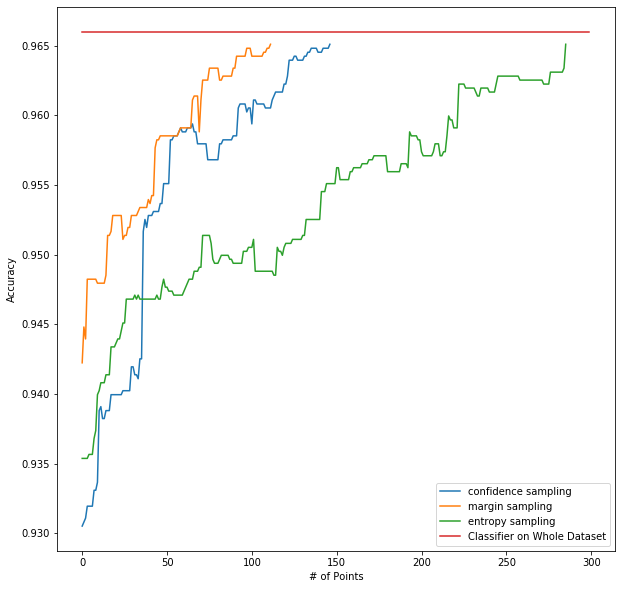

In [84]:
plt.figure(figsize=(10,10))
plt.plot(least_confident_track[0],label='confidence sampling')
plt.plot(margin_sampling_track[0],label='margin sampling')
plt.plot(entropy_track[0],label='entropy sampling')
plt.plot([0.966 for i in range(300)],label='Classifier on Whole Dataset')
plt.xlabel('# of Points')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [90]:
kl_track = active_committee_stream_based(x,y,x_tes,y_tes,5,KL_max_disagreement)
vote_track = active_committee_stream_based(x,y,x_tes,y_tes,5,vote_entropy_sampling)

Ignored this point from labelling: 5238
Ignored this point from labelling: 4741
Ignored this point from labelling: 575
Ignored this point from labelling: 6008
Point updated: 4766; Accuracy achieved: 0.9516728624535316
Ignored this point from labelling: 6028
Point updated: 2056; Accuracy achieved: 0.9516728624535316
Ignored this point from labelling: 2501
Point updated: 2913; Accuracy achieved: 0.9516728624535316
Ignored this point from labelling: 3816
Point updated: 6681; Accuracy achieved: 0.9516728624535316
Ignored this point from labelling: 5985
Ignored this point from labelling: 6501
Ignored this point from labelling: 5905
Ignored this point from labelling: 162
Ignored this point from labelling: 160
Ignored this point from labelling: 1823
Ignored this point from labelling: 3108
Ignored this point from labelling: 580
Ignored this point from labelling: 46
Ignored this point from labelling: 534
Ignored this point from labelling: 6338
Ignored this point from labelling: 6928
Ignored thi

Ignored this point from labelling: 1803
Ignored this point from labelling: 6056
Ignored this point from labelling: 3153
Ignored this point from labelling: 5389
Ignored this point from labelling: 2890
Ignored this point from labelling: 5252
Ignored this point from labelling: 4680
Ignored this point from labelling: 1998
Ignored this point from labelling: 5631
Ignored this point from labelling: 4243
Ignored this point from labelling: 4142
Ignored this point from labelling: 6717
Point updated: 6725; Accuracy achieved: 0.9539605376036603
Ignored this point from labelling: 867
Ignored this point from labelling: 3790
Ignored this point from labelling: 7414
Ignored this point from labelling: 2838
Ignored this point from labelling: 6884
Ignored this point from labelling: 7111
Ignored this point from labelling: 3136
Ignored this point from labelling: 3316
Ignored this point from labelling: 2531
Point updated: 5383; Accuracy achieved: 0.9539605376036603
Ignored this point from labelling: 4974
Ign

Ignored this point from labelling: 3251
Ignored this point from labelling: 5325
Ignored this point from labelling: 1090
Ignored this point from labelling: 4160
Ignored this point from labelling: 5169
Ignored this point from labelling: 4228
Ignored this point from labelling: 4208
Ignored this point from labelling: 339
Ignored this point from labelling: 187
Ignored this point from labelling: 2502
Ignored this point from labelling: 1121
Ignored this point from labelling: 5083
Ignored this point from labelling: 467
Ignored this point from labelling: 4151
Ignored this point from labelling: 6144
Ignored this point from labelling: 6033
Ignored this point from labelling: 804
Ignored this point from labelling: 4160
Ignored this point from labelling: 1452
Ignored this point from labelling: 2886
Ignored this point from labelling: 1984
Ignored this point from labelling: 3115
Ignored this point from labelling: 3905
Ignored this point from labelling: 5671
Ignored this point from labelling: 3996
Igno

Ignored this point from labelling: 5862
Ignored this point from labelling: 6251
Ignored this point from labelling: 3183
Ignored this point from labelling: 2524
Ignored this point from labelling: 102
Ignored this point from labelling: 1296
Ignored this point from labelling: 2905
Ignored this point from labelling: 1750
Ignored this point from labelling: 6517
Ignored this point from labelling: 2642
Ignored this point from labelling: 7086
Ignored this point from labelling: 2284
Point updated: 2566; Accuracy achieved: 0.9576780097226194
Ignored this point from labelling: 1403
Point updated: 5602; Accuracy achieved: 0.9576780097226194
Ignored this point from labelling: 7363
Point updated: 1940; Accuracy achieved: 0.9605376036602803
Ignored this point from labelling: 1434
Ignored this point from labelling: 3615
Ignored this point from labelling: 1504
Ignored this point from labelling: 1732
Ignored this point from labelling: 1260
Ignored this point from labelling: 6576
Ignored this point from 

Ignored this point from labelling: 4476
Ignored this point from labelling: 3574
Point updated: 5021; Accuracy achieved: 0.9613954818415785
Ignored this point from labelling: 7120
Ignored this point from labelling: 5927
Ignored this point from labelling: 1381
Ignored this point from labelling: 6516
Ignored this point from labelling: 3278
Ignored this point from labelling: 6815
Ignored this point from labelling: 2092
Ignored this point from labelling: 6995
Ignored this point from labelling: 1751
Ignored this point from labelling: 1200
Ignored this point from labelling: 6617
Ignored this point from labelling: 6187
Ignored this point from labelling: 6772
Ignored this point from labelling: 1497
Ignored this point from labelling: 5193
Ignored this point from labelling: 2296
Ignored this point from labelling: 7488
Ignored this point from labelling: 6264
Ignored this point from labelling: 4133
Ignored this point from labelling: 6007
Ignored this point from labelling: 4350
Ignored this point fr

Ignored this point from labelling: 2252
Ignored this point from labelling: 1289
Ignored this point from labelling: 1888
Ignored this point from labelling: 775
Ignored this point from labelling: 3068
Ignored this point from labelling: 3068
Ignored this point from labelling: 4422
Ignored this point from labelling: 1881
Ignored this point from labelling: 3405
Ignored this point from labelling: 6262
Ignored this point from labelling: 6155
Ignored this point from labelling: 3224
Ignored this point from labelling: 6890
Ignored this point from labelling: 5260
Ignored this point from labelling: 5647
Ignored this point from labelling: 2669
Ignored this point from labelling: 6104
Ignored this point from labelling: 1044
Ignored this point from labelling: 3355
Ignored this point from labelling: 5322
Ignored this point from labelling: 3495
Ignored this point from labelling: 2854
Ignored this point from labelling: 647
Ignored this point from labelling: 6927
Ignored this point from labelling: 6133
Ig

Point updated: 2966; Accuracy achieved: 0.9633971975979411
Ignored this point from labelling: 2440
Ignored this point from labelling: 635
Ignored this point from labelling: 1684
Ignored this point from labelling: 1963
Ignored this point from labelling: 695
Ignored this point from labelling: 5358
Ignored this point from labelling: 2289
Ignored this point from labelling: 7074
Ignored this point from labelling: 1133
Ignored this point from labelling: 1893
Ignored this point from labelling: 5043
Ignored this point from labelling: 1446
Ignored this point from labelling: 628
Point updated: 1056; Accuracy achieved: 0.9642550757792393
Ignored this point from labelling: 2905
Ignored this point from labelling: 1644
Ignored this point from labelling: 6149
Ignored this point from labelling: 3604
Ignored this point from labelling: 6009
Ignored this point from labelling: 672
Ignored this point from labelling: 3070
Ignored this point from labelling: 665
Ignored this point from labelling: 727
Ignored 

Ignored this point from labelling: 6899
Ignored this point from labelling: 2592
Ignored this point from labelling: 7227
Ignored this point from labelling: 4646
Ignored this point from labelling: 3077
Ignored this point from labelling: 3765
Ignored this point from labelling: 4624
Ignored this point from labelling: 251
Ignored this point from labelling: 1773
Ignored this point from labelling: 7474
Ignored this point from labelling: 3801
Ignored this point from labelling: 5907
Ignored this point from labelling: 3715
Ignored this point from labelling: 4644
Ignored this point from labelling: 286
Ignored this point from labelling: 7231
Ignored this point from labelling: 2997
Ignored this point from labelling: 2442
Ignored this point from labelling: 5317
Ignored this point from labelling: 2710
Ignored this point from labelling: 2127
Ignored this point from labelling: 2988
Ignored this point from labelling: 327
Ignored this point from labelling: 5658
Ignored this point from labelling: 4961
Ign

Ignored this point from labelling: 6347
Ignored this point from labelling: 2864
Ignored this point from labelling: 2935
Ignored this point from labelling: 1181
Ignored this point from labelling: 772
Ignored this point from labelling: 3359
Ignored this point from labelling: 4479
Ignored this point from labelling: 4921
Ignored this point from labelling: 1868
Ignored this point from labelling: 6578
Ignored this point from labelling: 4879
Ignored this point from labelling: 2790
Ignored this point from labelling: 5127
Ignored this point from labelling: 2258
Ignored this point from labelling: 1675
Ignored this point from labelling: 2861
Ignored this point from labelling: 957
Ignored this point from labelling: 2890
Ignored this point from labelling: 3058
Ignored this point from labelling: 2436
Ignored this point from labelling: 5666
Ignored this point from labelling: 1088
Ignored this point from labelling: 6598
Ignored this point from labelling: 5517
Ignored this point from labelling: 6490
Ig

Ignored this point from labelling: 3774
Ignored this point from labelling: 382
Ignored this point from labelling: 2824
Ignored this point from labelling: 3859
Ignored this point from labelling: 6445
Ignored this point from labelling: 6215
Ignored this point from labelling: 2896
Ignored this point from labelling: 5871
Ignored this point from labelling: 2402
Ignored this point from labelling: 2362
Ignored this point from labelling: 580
Ignored this point from labelling: 6136
Ignored this point from labelling: 7313
Ignored this point from labelling: 7446
Ignored this point from labelling: 2368
Ignored this point from labelling: 5919
Ignored this point from labelling: 256
Ignored this point from labelling: 5176
Ignored this point from labelling: 3238
Ignored this point from labelling: 2774
Ignored this point from labelling: 2534
Ignored this point from labelling: 5037
Ignored this point from labelling: 4092
Ignored this point from labelling: 3967
Ignored this point from labelling: 1178
Ign

Ignored this point from labelling: 4337
Ignored this point from labelling: 2877
Ignored this point from labelling: 2433
Ignored this point from labelling: 3730
Ignored this point from labelling: 903
Ignored this point from labelling: 839
Ignored this point from labelling: 3085
Ignored this point from labelling: 1814
Ignored this point from labelling: 5485
Ignored this point from labelling: 6279
Ignored this point from labelling: 31
Ignored this point from labelling: 6297
Ignored this point from labelling: 1201
Ignored this point from labelling: 781
Ignored this point from labelling: 3503
Ignored this point from labelling: 7175
Ignored this point from labelling: 2442
Ignored this point from labelling: 3722
Ignored this point from labelling: 1346
Ignored this point from labelling: 1714
Ignored this point from labelling: 994
Ignored this point from labelling: 5182
Ignored this point from labelling: 1247
Ignored this point from labelling: 1553
Ignored this point from labelling: 4878
Ignore

Ignored this point from labelling: 1002
Ignored this point from labelling: 3310
Ignored this point from labelling: 3084
Ignored this point from labelling: 5867
Point updated: 5978; Accuracy achieved: 0.9273663139834144
Ignored this point from labelling: 376
Ignored this point from labelling: 4590
Ignored this point from labelling: 6992
Point updated: 5331; Accuracy achieved: 0.92622247640835
Ignored this point from labelling: 4728
Ignored this point from labelling: 7429
Ignored this point from labelling: 2286
Ignored this point from labelling: 309
Ignored this point from labelling: 98
Ignored this point from labelling: 4742
Ignored this point from labelling: 4610
Ignored this point from labelling: 2559
Ignored this point from labelling: 1038
Ignored this point from labelling: 4639
Ignored this point from labelling: 1465
Ignored this point from labelling: 5691
Ignored this point from labelling: 7437
Ignored this point from labelling: 1797
Ignored this point from labelling: 4444
Ignored 

Ignored this point from labelling: 4693
Point updated: 3909; Accuracy achieved: 0.9276522733771805
Ignored this point from labelling: 273
Ignored this point from labelling: 3585
Ignored this point from labelling: 7261
Ignored this point from labelling: 6490
Ignored this point from labelling: 3038
Point updated: 2452; Accuracy achieved: 0.93279954246497
Ignored this point from labelling: 4168
Ignored this point from labelling: 5536
Ignored this point from labelling: 5266
Ignored this point from labelling: 6265
Ignored this point from labelling: 5236
Ignored this point from labelling: 1717
Point updated: 5339; Accuracy achieved: 0.9333714612525021
Ignored this point from labelling: 3236
Ignored this point from labelling: 3470
Ignored this point from labelling: 3059
Point updated: 4567; Accuracy achieved: 0.9333714612525021
Ignored this point from labelling: 6674
Ignored this point from labelling: 5420
Ignored this point from labelling: 5249
Ignored this point from labelling: 2953
Ignored

Ignored this point from labelling: 2654
Ignored this point from labelling: 3475
Ignored this point from labelling: 3728
Ignored this point from labelling: 658
Ignored this point from labelling: 5202
Ignored this point from labelling: 3882
Ignored this point from labelling: 2206
Ignored this point from labelling: 1865
Ignored this point from labelling: 3994
Ignored this point from labelling: 7216
Ignored this point from labelling: 7192
Ignored this point from labelling: 6802
Ignored this point from labelling: 6660
Point updated: 6845; Accuracy achieved: 0.9379468115527595
Ignored this point from labelling: 4232
Ignored this point from labelling: 205
Ignored this point from labelling: 3945
Ignored this point from labelling: 1448
Ignored this point from labelling: 5479
Ignored this point from labelling: 2963
Ignored this point from labelling: 4786
Ignored this point from labelling: 733
Ignored this point from labelling: 5178
Point updated: 1517; Accuracy achieved: 0.9379468115527595
Ignor

Point updated: 210; Accuracy achieved: 0.9413783242779525
Ignored this point from labelling: 6165
Ignored this point from labelling: 4247
Ignored this point from labelling: 6080
Ignored this point from labelling: 1985
Ignored this point from labelling: 2047
Ignored this point from labelling: 3390
Ignored this point from labelling: 3644
Ignored this point from labelling: 2658
Ignored this point from labelling: 6626
Ignored this point from labelling: 5894
Ignored this point from labelling: 5574
Ignored this point from labelling: 6695
Ignored this point from labelling: 872
Ignored this point from labelling: 4635
Ignored this point from labelling: 1990
Ignored this point from labelling: 6145
Ignored this point from labelling: 3012
Ignored this point from labelling: 1100
Ignored this point from labelling: 1511
Ignored this point from labelling: 646
Point updated: 6182; Accuracy achieved: 0.9413783242779525
Ignored this point from labelling: 5309
Ignored this point from labelling: 2296
Ignor

Ignored this point from labelling: 6931
Ignored this point from labelling: 361
Ignored this point from labelling: 3294
Ignored this point from labelling: 955
Ignored this point from labelling: 3356
Ignored this point from labelling: 4969
Ignored this point from labelling: 1833
Ignored this point from labelling: 997
Ignored this point from labelling: 3859
Ignored this point from labelling: 5557
Ignored this point from labelling: 2298
Point updated: 3185; Accuracy achieved: 0.946525593365742
Ignored this point from labelling: 5345
Ignored this point from labelling: 63
Ignored this point from labelling: 6224
Ignored this point from labelling: 4760
Ignored this point from labelling: 4052
Ignored this point from labelling: 1101
Ignored this point from labelling: 2325
Ignored this point from labelling: 6830
Ignored this point from labelling: 5615
Ignored this point from labelling: 5550
Ignored this point from labelling: 3504
Ignored this point from labelling: 1119
Ignored this point from lab

Ignored this point from labelling: 668
Ignored this point from labelling: 7349
Ignored this point from labelling: 4151
Ignored this point from labelling: 4091
Ignored this point from labelling: 3010
Point updated: 4975; Accuracy achieved: 0.9473834715470403
Ignored this point from labelling: 147
Ignored this point from labelling: 1119
Ignored this point from labelling: 1902
Ignored this point from labelling: 5731
Ignored this point from labelling: 5680
Ignored this point from labelling: 3984
Ignored this point from labelling: 7291
Ignored this point from labelling: 1789
Ignored this point from labelling: 5674
Ignored this point from labelling: 1239
Ignored this point from labelling: 3603
Ignored this point from labelling: 5600
Ignored this point from labelling: 1812
Ignored this point from labelling: 4977
Point updated: 3755; Accuracy achieved: 0.9479553903345725
Ignored this point from labelling: 3603
Ignored this point from labelling: 5483
Ignored this point from labelling: 1822
Igno

Ignored this point from labelling: 5904
Ignored this point from labelling: 2379
Ignored this point from labelling: 325
Point updated: 4410; Accuracy achieved: 0.9508149842722333
Ignored this point from labelling: 5225
Ignored this point from labelling: 4106
Ignored this point from labelling: 5548
Ignored this point from labelling: 265
Ignored this point from labelling: 5964
Ignored this point from labelling: 6920
Ignored this point from labelling: 1446
Ignored this point from labelling: 6834
Ignored this point from labelling: 2747
Ignored this point from labelling: 2768
Ignored this point from labelling: 1605
Ignored this point from labelling: 437
Ignored this point from labelling: 3052
Ignored this point from labelling: 768
Ignored this point from labelling: 5920
Ignored this point from labelling: 7317
Ignored this point from labelling: 968
Point updated: 6390; Accuracy achieved: 0.9505290248784672
Ignored this point from labelling: 2085
Ignored this point from labelling: 7393
Ignored

Ignored this point from labelling: 556
Ignored this point from labelling: 4341
Ignored this point from labelling: 6812
Ignored this point from labelling: 5382
Ignored this point from labelling: 3957
Ignored this point from labelling: 3236
Ignored this point from labelling: 1371
Ignored this point from labelling: 929
Ignored this point from labelling: 814
Ignored this point from labelling: 180
Ignored this point from labelling: 7251
Ignored this point from labelling: 5266
Ignored this point from labelling: 2049
Ignored this point from labelling: 749
Ignored this point from labelling: 5457
Ignored this point from labelling: 1815
Ignored this point from labelling: 3579
Ignored this point from labelling: 7404
Ignored this point from labelling: 3930
Ignored this point from labelling: 6131
Ignored this point from labelling: 1833
Ignored this point from labelling: 2751
Ignored this point from labelling: 6721
Ignored this point from labelling: 6827
Ignored this point from labelling: 2862
Ignor

Ignored this point from labelling: 1931
Ignored this point from labelling: 4190
Ignored this point from labelling: 1071
Ignored this point from labelling: 7260
Ignored this point from labelling: 6533
Ignored this point from labelling: 4757
Point updated: 1030; Accuracy achieved: 0.9591078066914498
Ignored this point from labelling: 1823
Ignored this point from labelling: 5668
Ignored this point from labelling: 897
Ignored this point from labelling: 968
Ignored this point from labelling: 6677
Ignored this point from labelling: 1949
Ignored this point from labelling: 7192
Ignored this point from labelling: 1329
Ignored this point from labelling: 2449
Ignored this point from labelling: 4338
Ignored this point from labelling: 1911
Ignored this point from labelling: 1930
Ignored this point from labelling: 1372
Ignored this point from labelling: 5120
Ignored this point from labelling: 6694
Ignored this point from labelling: 931
Ignored this point from labelling: 2161
Ignored this point from 

Ignored this point from labelling: 1024
Ignored this point from labelling: 6149
Ignored this point from labelling: 2413
Ignored this point from labelling: 6337
Ignored this point from labelling: 3422
Ignored this point from labelling: 1416
Ignored this point from labelling: 5754
Ignored this point from labelling: 5251
Ignored this point from labelling: 531
Ignored this point from labelling: 5317
Ignored this point from labelling: 5717
Ignored this point from labelling: 3797
Ignored this point from labelling: 2867
Ignored this point from labelling: 3429
Ignored this point from labelling: 5709
Ignored this point from labelling: 1515
Ignored this point from labelling: 241
Ignored this point from labelling: 5667
Point updated: 43; Accuracy achieved: 0.9639691163854732
Ignored this point from labelling: 1126
Ignored this point from labelling: 2298
Ignored this point from labelling: 6099
Ignored this point from labelling: 6661
Ignored this point from labelling: 2096
Ignored this point from l

Ignored this point from labelling: 4768
Ignored this point from labelling: 6186
Point updated: 5143; Accuracy achieved: 0.9648269945667716
Ignored this point from labelling: 6814
Point updated: 7294; Accuracy achieved: 0.9648269945667716
Ignored this point from labelling: 4123
Ignored this point from labelling: 1574
Ignored this point from labelling: 6348
Ignored this point from labelling: 6655
Ignored this point from labelling: 4776
Ignored this point from labelling: 330
Ignored this point from labelling: 6585
Ignored this point from labelling: 1006
Ignored this point from labelling: 1387
Ignored this point from labelling: 6452
Ignored this point from labelling: 6394
Ignored this point from labelling: 3196
Point updated: 6468; Accuracy achieved: 0.9648269945667716
Ignored this point from labelling: 1373
Ignored this point from labelling: 7390
Ignored this point from labelling: 2943
Ignored this point from labelling: 7300
Ignored this point from labelling: 46
Ignored this point from la

Ignored this point from labelling: 4466
Ignored this point from labelling: 1239
Ignored this point from labelling: 434
Ignored this point from labelling: 5590
Ignored this point from labelling: 4207
Point updated: 554; Accuracy achieved: 0.9633971975979411
Ignored this point from labelling: 5054
Ignored this point from labelling: 2964
Ignored this point from labelling: 6164
Ignored this point from labelling: 5627
Ignored this point from labelling: 169
Ignored this point from labelling: 2886
Ignored this point from labelling: 165
Ignored this point from labelling: 2790
Point updated: 3021; Accuracy achieved: 0.9633971975979411
Ignored this point from labelling: 7049
Ignored this point from labelling: 2013
Ignored this point from labelling: 1100
Ignored this point from labelling: 5613
Point updated: 3358; Accuracy achieved: 0.9633971975979411
Ignored this point from labelling: 4736
Ignored this point from labelling: 4938
Ignored this point from labelling: 4662
Ignored this point from lab

In [92]:
print(kl_track[2],vote_track[2])

2049 2170


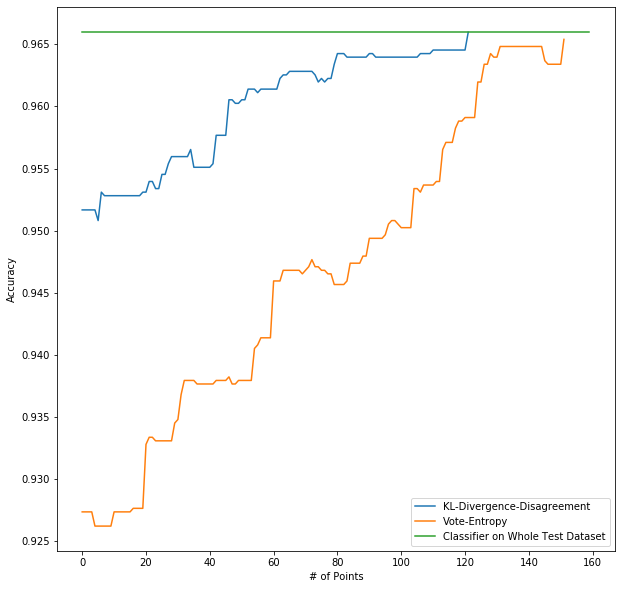

In [94]:
plt.figure(figsize=(10,10))
plt.plot(kl_track[0],label='KL-Divergence-Disagreement')
plt.plot(vote_track[0],label='Vote-Entropy')
plt.plot([0.966 for i in range(160)],label='Classifier on Whole Test Dataset')
plt.xlabel('# of Points')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()